# Tasks
1. Function to measure cosine distance between face descriptors. It is useful to be able to take in a shape-(M, D) array of M descriptor vectors and a shape-(N, D) array of N descriptor vectors, and compute a shape-(M, N) array of cosine distances – this holds all MxN combinations of pairwise cosine distances.
2. Functionality to display an image with a box around detected faces with labels to indicate matches or an “Unknown” label otherwise

In [13]:
%matplotlib notebook

In [15]:
import numpy as np
from facenet_models import FacenetModel
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.pyplot import text

from PIL import Image

# from profile_functionality.py import query_database.py

## Task 1: Cosine Distance Function

In [3]:
def cos_distance (d1, d2):
    """
    Calculates the cosine distance between two descriptor vectors.

    Parameters
    ----------
    d1 : numpy.ndarray, shape-(M, D)
        The first descriptor vector, an array of M descriptor vectors.

    d2 : numpy.ndarray, shape-(N, D)
        The second descriptor vector, an array of N descriptor vectors.
    
    Returns
    -------
    numpy.ndarray, shape-(M, N)
        An array of cosine distances which holds all MxN combination so of pairwise cosine distances.
    """
    d1_mag = np.linalg.norm(d1, axis=1)
    d2_mag = np.linalg.norm(d2, axis=1)
    return 1 - ( np.matmul(d1, d2.T) / (d1_mag * d2_mag) )

In [4]:
a = np.array([[3, 4]])
b = np.array([[5, 12]])

cos_distance(a, b)

array([[0.03076923]])

## Task 2: Draw boxes around people's faces and label

In [24]:
def get_descriptors(image_data):
    """
    Returns a descriptors numpy array.

    Parameters
    ----------
    image_data : numpy.ndarray, shape-(R, C, 3) (RGB is the last dimension)
        Pixel information for the image.
    
    Returns
    -------
    np.ndarray, shape-(N, 512)
        The descriptor vectors, where N is the number of faces.
    """
    
    model = FacenetModel()
    boxes, probabilities, _ = model.detect(image_data)
    descriptors = model.compute_descriptors(image_data, boxes)
    print (descriptors.shape)
    return descriptors

def label_faces(image_data):
    """
    Displays an image with boxes around people's faces and labels them with names.

    Parameters
    ----------
    image_data : numpy.ndarray, shape-(R, C, 3) (RGB is the last dimension)
        Pixel information for the image.
    """
    
    # this will download the pretrained weights (if they haven't already been fetched)
    # which should take just a few seconds
    model = FacenetModel()

    # detect all faces in an image
    # returns a tuple of (boxes, probabilities, landmarks)
    boxes, probabilities, _ = model.detect(image_data)

    # producing a face descriptor for each face
    # returns a (N, 512) array, where N is the number of boxes
    # and each descriptor vector is 512-dimensional
    descriptors = model.compute_descriptors(image_data, boxes)
    
    print(f"Number of faces detected: {len(boxes)}")

    fig, ax = plt.subplots()
    ax.imshow(pic)

    for box, prob in zip(boxes, probabilities):
        # draw the box on the screen
        print("BOX:", box)
        ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))
        # add names to the box

(552, 428, 3)


<IPython.core.display.Javascript object>


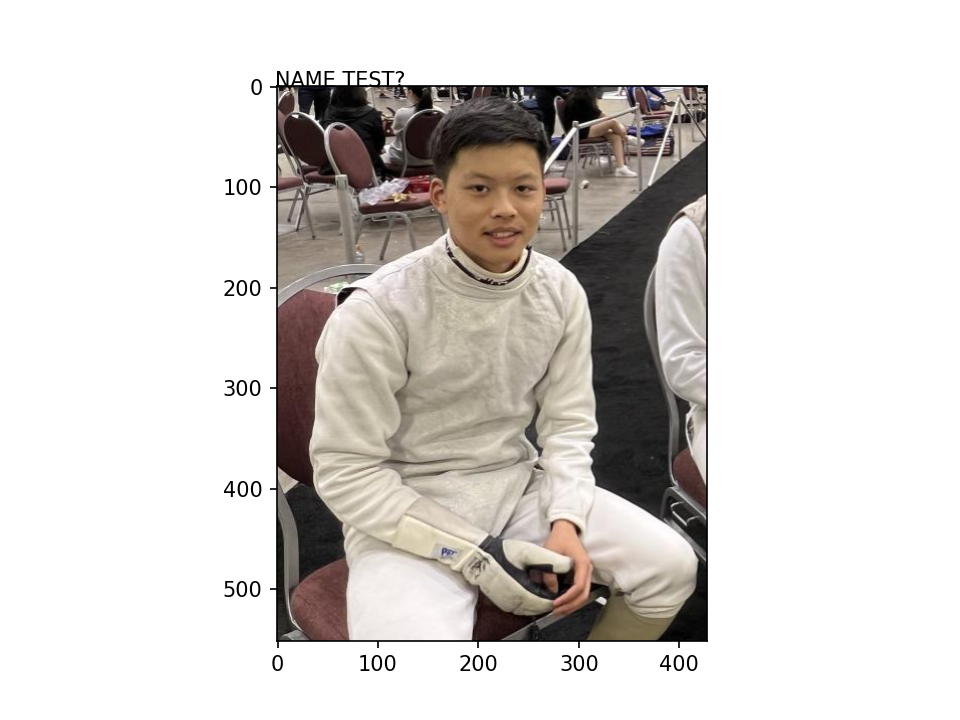

(1, 512)


array([[ 0.04567714,  0.02019389, -0.03001399,  0.02776856,  0.01170744,
         0.02438904, -0.05945341,  0.05429924, -0.02217013,  0.03582334,
         0.0459579 ,  0.05937887,  0.03223801,  0.01523088, -0.00815795,
         0.00606754,  0.09913638,  0.08369171, -0.00626598,  0.0329692 ,
         0.05555118,  0.0857104 ,  0.0661121 , -0.05888295,  0.00223973,
        -0.02040713,  0.04918607,  0.00368128,  0.02098675,  0.03159715,
         0.02973042, -0.03445024, -0.02298314,  0.07051122,  0.01653248,
        -0.06161111, -0.06085287, -0.1061493 , -0.00401462,  0.00773619,
         0.00707185, -0.0262076 ,  0.04219248,  0.06780377, -0.05383894,
         0.06368477, -0.02643074, -0.01676284, -0.07301699,  0.00190863,
        -0.02119729, -0.04106409,  0.05894376,  0.0042783 ,  0.00482527,
        -0.05934555, -0.01456597, -0.02702572,  0.00068211, -0.03525121,
         0.05382196,  0.12566338, -0.02862344,  0.04611188,  0.02739246,
        -0.01434739, -0.0147907 , -0.0649194 ,  0.0

In [25]:
fpath = "./Images/"
img_path = fpath + "evan1.png"
pic = np.array(Image.open(img_path))[:,:,:3]
print(pic.shape)
fig, ax = plt.subplots()
ax.imshow(pic)
ax.text(-2.5, 0.5, "NAME TEST?")

d = get_descriptors(pic)

Number of faces detected: 1


<IPython.core.display.Javascript object>


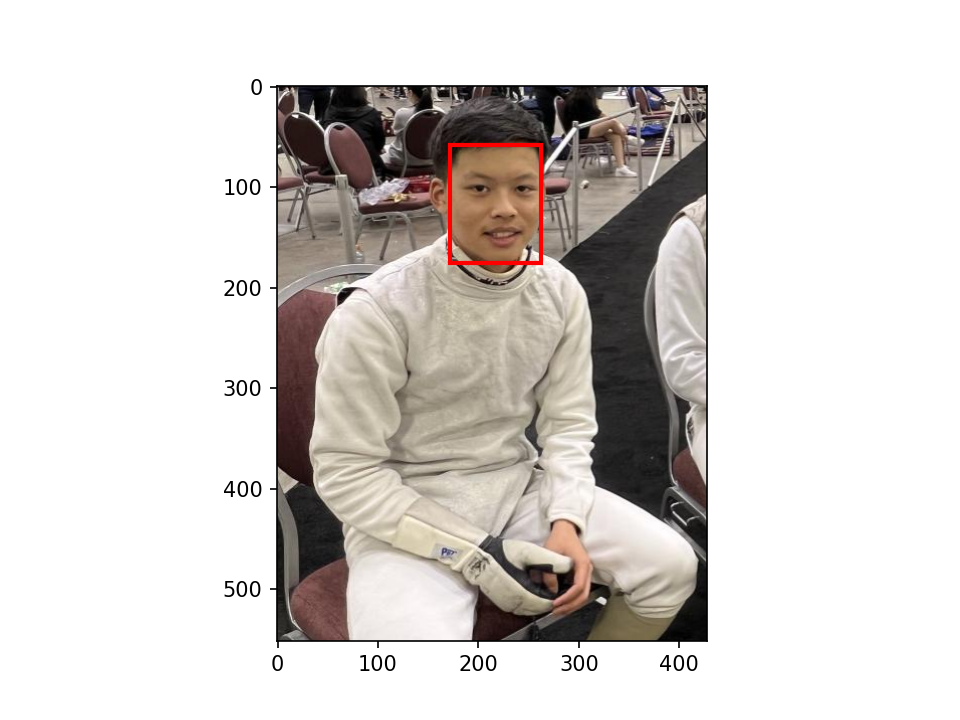

BOX: [171.4204    58.167618 262.08047  175.7791  ]


In [23]:
label_faces(pic)